In [1]:
!git clone https://github.com/bemc22/AHFD

Cloning into 'AHFD'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 8), reused 7 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 2.84 MiB | 6.47 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [4]:
!pip install torch_dct

In [2]:
%cd AHFD

/content/AHFD


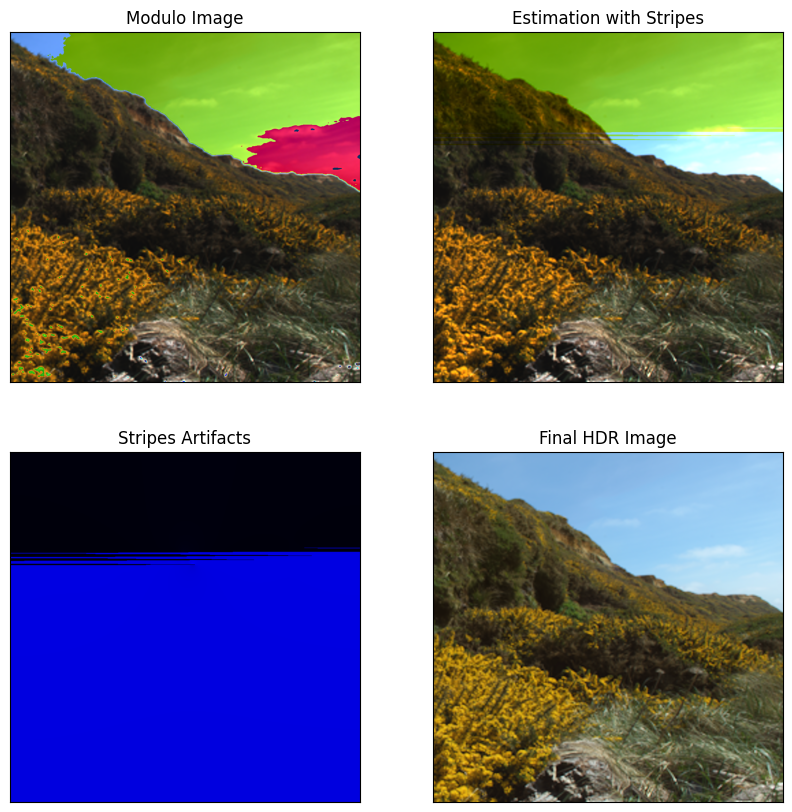

In [5]:
import numpy as np
import torch

from utils import recons, modulo, channel_norm, custom_tone

import matplotlib.pyplot as plt

# set default tensor type
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

numpy2tensor = lambda x: torch.tensor(x).float().unsqueeze(0).permute(0, 3, 1, 2)
tensor2numpy = lambda x: x.permute(0, 2, 3, 1).squeeze().cpu().numpy()
normalize = lambda x: (x - x.min()) / (x.max() - x.min())

img_modulo = np.load("img_modulo.npy") / 255
img_modulo = numpy2tensor(img_modulo)

x_est, stripes, x_est2  = recons(img_modulo, DO=2, vertical=False, t=0.6)

img_modulo = tensor2numpy(img_modulo)
x_est      = tensor2numpy(x_est)
stripes    = tensor2numpy(stripes)

# Normalize the images
stripes = channel_norm(stripes)

# Post processing for the final image
x_est2 = normalize(x_est2)
x_est2 = tensor2numpy(x_est2)
x_est2 = custom_tone(x_est2)
x_est2 = np.power(x_est2, 1.1)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
titles = ["Modulo Image", "Estimation with Stripes", "Stripes Artifacts", "Final HDR Image"]
images = [img_modulo, x_est, stripes, x_est2]

for i, (title, img) in enumerate(zip(titles, images)):
    ax[i//2, i%2].imshow(img, cmap="gray")
    ax[i//2, i%2].set_xticks([])
    ax[i//2, i%2].set_yticks([])
    ax[i//2, i%2].set_title(title)

plt.show()